In [ ]:
# Basic libraries
import numpy as np
import pandas as pd
import os
import cv2
from PIL import Image

# TensorFlow and Keras for building the CNN
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense,LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import he_normal
from tensorflow.keras.callbacks import EarlyStopping

# for model validation
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc

# For visualization
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

def crop_and_save_images(src_folder, dest_folder, target_size=(524, 524)):
    # Create destination folder if it doesn't exist
    if not os.path.exists(dest_folder):
        os.makedirs(dest_folder)

    # Iterate over all images in the source folder
    for img_name in os.listdir(src_folder):
        img_path = os.path.join(src_folder, img_name)

        # Read image
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Failed to load image {img_name}.")
            continue

        # Compute center and crop dimensions
        center_x, center_y = img.shape[1] // 2, img.shape[0] // 2
        crop_x1 = max(center_x - target_size[0] // 2, 0)
        crop_x2 = min(center_x + target_size[0] // 2, img.shape[1])
        crop_y1 = max(center_y - target_size[1] // 2, 0)
        crop_y2 = min(center_y + target_size[1] // 2, img.shape[0])

        # Crop image
        cropped_img = img[crop_y1:crop_y2, crop_x1:crop_x2]

        # Save cropped image to destination folder
        dest_path = os.path.join(dest_folder, img_name)
        cv2.imwrite(dest_path, cropped_img)

    print(f"Images from {src_folder} have been cropped and saved to {dest_folder}.")

# Example usage
src_folder = "/content/drive/MyDrive/ashwini_last/train"
dest_folder = "/content/drive/MyDrive/ashwini_crop_last/train1"
crop_and_save_images(src_folder, dest_folder)


Images from /content/drive/MyDrive/ashwini_last/train have been cropped and saved to /content/drive/MyDrive/ashwini_crop_last/train1.


In [ ]:
def crop_and_save_images(src_folder, dest_folder, target_size=(524, 524)):
    # Create destination folder if it doesn't exist
    if not os.path.exists(dest_folder):
        os.makedirs(dest_folder)

    # Iterate over all images in the source folder
    for img_name in os.listdir(src_folder):
        img_path = os.path.join(src_folder, img_name)

        # Read image
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Failed to load image {img_name}.")
            continue

        # Compute center and crop dimensions
        center_x, center_y = img.shape[1] // 2, img.shape[0] // 2
        crop_x1 = max(center_x - target_size[0] // 2, 0)
        crop_x2 = min(center_x + target_size[0] // 2, img.shape[1])
        crop_y1 = max(center_y - target_size[1] // 2, 0)
        crop_y2 = min(center_y + target_size[1] // 2, img.shape[0])

        # Crop image
        cropped_img = img[crop_y1:crop_y2, crop_x1:crop_x2]

        # Save cropped image to destination folder
        dest_path = os.path.join(dest_folder, img_name)
        cv2.imwrite(dest_path, cropped_img)

    print(f"Images from {src_folder} have been cropped and saved to {dest_folder}.")


src_folder = "/content/drive/MyDrive/ashwini_last/validate"
dest_folder = "/content/drive/MyDrive/ashwini_crop_last/validate"
crop_and_save_images(src_folder, dest_folder)


Images from /content/drive/MyDrive/ashwini_last/validate have been cropped and saved to /content/drive/MyDrive/ashwini_crop_last/validate.


In [ ]:
def crop_and_save_images(src_folder, dest_folder, target_size=(524, 524)):
    # Create destination folder if it doesn't exist
    if not os.path.exists(dest_folder):
        os.makedirs(dest_folder)

    # Iterate over all images in the source folder
    for img_name in os.listdir(src_folder):
        img_path = os.path.join(src_folder, img_name)

        # Read image
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Failed to load image {img_name}.")
            continue

        # Compute center and crop dimensions
        center_x, center_y = img.shape[1] // 2, img.shape[0] // 2
        crop_x1 = max(center_x - target_size[0] // 2, 0)
        crop_x2 = min(center_x + target_size[0] // 2, img.shape[1])
        crop_y1 = max(center_y - target_size[1] // 2, 0)
        crop_y2 = min(center_y + target_size[1] // 2, img.shape[0])

        # Crop image
        cropped_img = img[crop_y1:crop_y2, crop_x1:crop_x2]

        # Save cropped image to destination folder
        dest_path = os.path.join(dest_folder, img_name)
        cv2.imwrite(dest_path, cropped_img)

    print(f"Images from {src_folder} have been cropped and saved to {dest_folder}.")


src_folder = "/content/drive/MyDrive/ashwini_last/test"
dest_folder = "/content/drive/MyDrive/ashwini_crop_last/test"
crop_and_save_images(src_folder, dest_folder)


Images from /content/drive/MyDrive/ashwini_last/test have been cropped and saved to /content/drive/MyDrive/ashwini_crop_last/test.


In [ ]:
!ls //content/drive/MyDrive/ashwini_crop_last/


test  test.csv	train1	train.csv  validate  validate.csv


In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/ashwini_crop_last/train.csv')
validation_df = pd.read_csv('/content/drive/MyDrive/ashwini_crop_last/validate.csv')
test_df = pd.read_csv('/content/drive/MyDrive/ashwini_crop_last/test.csv')

print("Number of entries in train.csv:", len(train_df))
print("Number of entries in validation.csv:", len(validation_df))
print("Number of entries in test.csv:", len(test_df))

Number of entries in train.csv: 439
Number of entries in validation.csv: 93
Number of entries in test.csv: 93


In [ ]:
!ls /content/drive/MyDrive/ashwini_crop_last/train1 | wc -l
!ls /content/drive/MyDrive/ashwini_crop_last/validate | wc -l
!ls /content/drive/MyDrive/ashwini_crop_last/test| wc -l

439
93
93


In [ ]:
image_path = "/content/drive/MyDrive/ashwini_crop_last/train1/04-02-07_2585.png"
with Image.open(image_path) as img:
    width, height = img.size

print(f"Image dimensions: {width} x {height}")

Image dimensions: 524 x 524


In [ ]:
base_dir = "/content/drive/MyDrive/ashwini_crop_last"
train_dir = os.path.join(base_dir, "train1")
train_csv_path = os.path.join(base_dir, "train.csv")

# Load train.csv
train_df = pd.read_csv(train_csv_path)

# Load images
train_images = []
for img_name in train_df['ETC_image_name']:
    img_path = os.path.join(train_dir, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    train_images.append(img)

train_images = np.array(train_images)

In [ ]:
test_dir = os.path.join(base_dir, "test")
test_csv_path = os.path.join(base_dir, "test.csv")
validate_dir = os.path.join(base_dir, "validate")
validate_csv_path = os.path.join(base_dir, "validate.csv")

# Load test.csv
test_df = pd.read_csv(test_csv_path)

# Load test images
test_images = []
for img_name in test_df['ETC_image_name']:
    img_path = os.path.join(test_dir, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    test_images.append(img)

test_images = np.array(test_images)

# Load validate.csv
validate_df = pd.read_csv(validate_csv_path)

# Load validation images
validate_images = []
for img_name in validate_df['ETC_image_name']:
    img_path = os.path.join(validate_dir, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    validate_images.append(img)

validate_images = np.array(validate_images)


In [ ]:
# Normalize the images
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
validate_images = validate_images.astype('float32') / 255

In [ ]:

# LeakyReLU activation
leaky_relu = LeakyReLU(alpha=0.01)

model = Sequential([
    # First Convolutional Layer
    Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation=leaky_relu,
           input_shape=(524, 524, 1), padding='same', kernel_regularizer=l2(0.01), kernel_initializer=he_normal()),
    AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    Dropout(0.2),

    # Second Convolutional Layer
    Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation=leaky_relu,
           padding='valid', kernel_regularizer=l2(0.01), kernel_initializer=he_normal()),
    AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    Dropout(0.2),

    # Flatten the output to feed it into dense layers
    Flatten(),

    # Fully Connected Layers
    Dense(120, activation=leaky_relu, kernel_regularizer=l2(0.01), kernel_initializer=he_normal()),
    Dropout(0.2),
    Dense(84, activation=leaky_relu, kernel_regularizer=l2(0.01), kernel_initializer=he_normal()),
    Dropout(0.2),

    # Final Layer (Binary Classification with Sigmoid)
    Dense(1, activation='sigmoid', kernel_initializer=he_normal())
])

# Compile the model with 'binary_crossentropy'
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 524, 524, 6)       156       
                                                                 
 average_pooling2d (Average  (None, 262, 262, 6)       0         
 Pooling2D)                                                      
                                                                 
 dropout (Dropout)           (None, 262, 262, 6)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 258, 258, 16)      2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 129, 129, 16)      0         
 gePooling2D)                                                    
                                                                 
 dropout_1 (Dropout)         (None, 129, 129, 16)      0

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

history = model.fit(train_images, train_df['Class'],
                    epochs=50,
                    batch_size=32,
                    validation_data=(validate_images, validate_df['Class']),
                    callbacks=[early_stop])

Epoch 1/50
14/14 [==============================] - 15s 145ms/step - loss: 6.1718 - accuracy: 0.5399 - val_loss: 4.8277 - val_accuracy: 0.7204
Epoch 2/50
14/14 [==============================] - 1s 37ms/step - loss: 5.2800 - accuracy: 0.6014 - val_loss: 4.5340 - val_accuracy: 0.7527
Epoch 3/50
14/14 [==============================] - 1s 38ms/step - loss: 4.8289 - accuracy: 0.5558 - val_loss: 4.3663 - val_accuracy: 0.5591
Epoch 4/50
14/14 [==============================] - 1s 38ms/step - loss: 4.3514 - accuracy: 0.5809 - val_loss: 4.1407 - val_accuracy: 0.7204
Epoch 5/50
14/14 [==============================] - 1s 37ms/step - loss: 4.1540 - accuracy: 0.5968 - val_loss: 4.0593 - val_accuracy: 0.5699
Epoch 6/50
14/14 [==============================] - 1s 37ms/step - loss: 3.9727 - accuracy: 0.6241 - val_loss: 3.9082 - val_accuracy: 0.6667
Epoch 7/50
14/14 [==============================] - 1s 38ms/step - loss: 3.8312 - accuracy: 0.6446 - val_loss: 3.7743 - val_accuracy: 0.7204
Epoch 8/50


In [ ]:
# final training accuracy
final_training_accuracy = history.history['accuracy'][-1]

print("Final Training Accuracy: {:.4f}".format(final_training_accuracy))

Final Training Accuracy: 0.7904


In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_df['Class'], verbose=1)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

3/3 [==============================] - 0s 17ms/step - loss: 2.2364 - accuracy: 0.5161
Test Loss: 2.2364
Test Accuracy: 0.5161


In [ ]:
predictions = model.predict(test_images)

3/3 [==============================] - 0s 14ms/step


In [ ]:

# Make predictions for all test images
predictions = model.predict(test_images)

# Convert predictions to binary labels
binary_predictions = np.round(predictions)

# Calculate evaluation metrics
f1 = f1_score(test_df['Class'], binary_predictions)
precision = precision_score(test_df['Class'], binary_predictions)
recall = recall_score(test_df['Class'], binary_predictions)

# Print metrics with 2 decimal places
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


3/3 [==============================] - 0s 14ms/step
F1 Score: 0.6018
Precision: 0.4474
Recall: 0.9189


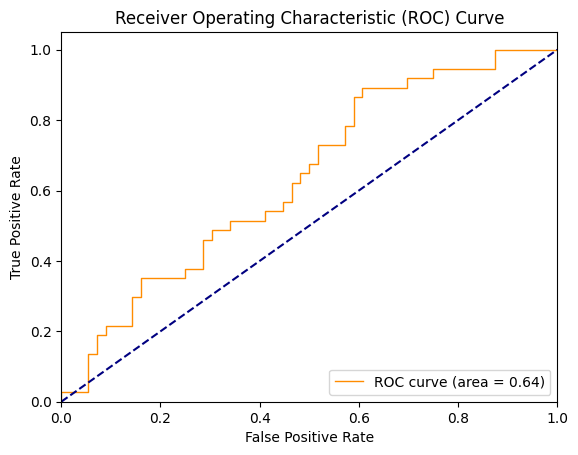

In [ ]:
#ROC

fpr, tpr, thresholds = roc_curve(test_df['Class'], predictions)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

1/1 [==============================] - 0s 212ms/step


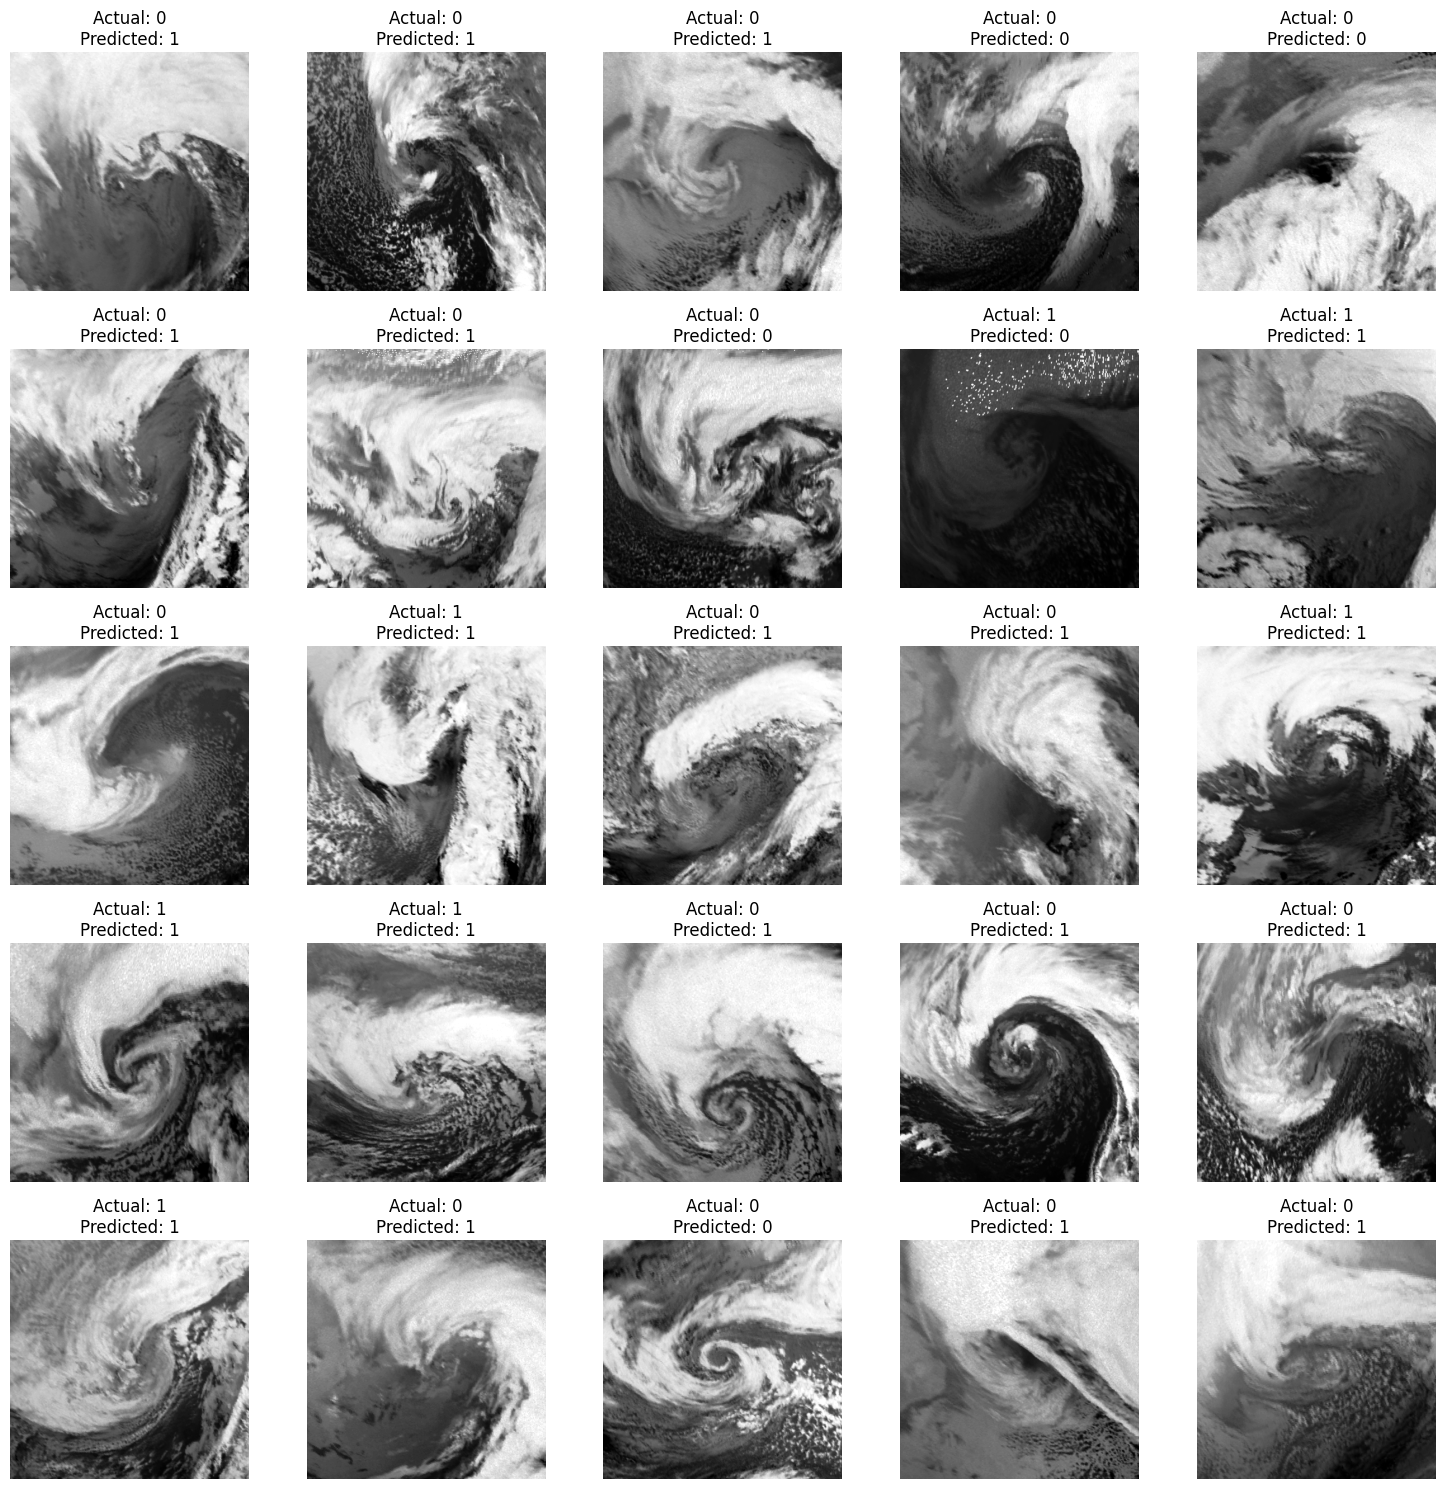

In [ ]:
# Define the threshold
threshold = 0.5

# Number of images to display
num_images = 25

# Predict classes for the test images
predictions = model.predict(test_images[:num_images])
predicted_classes = (predictions > threshold).astype(int).flatten()

# Actual classes
actual_classes = test_df['Class'].values[:num_images]

# Display the images
plt.figure(figsize=(15, 15))
for i in range(num_images):
    plt.subplot(5, 5, i+1)  # Adjust the grid size if you change num_images
    plt.imshow(test_images[i].squeeze(), cmap='gray')  # Display grayscale image
    plt.title(f"Actual: {actual_classes[i]}\nPredicted: {predicted_classes[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

As we can see the validation accuracy is dropping in final few epoch taht indicates  model is struggling to generalize to the validation data. this could ne because the model may have overfit the training data, which means it learned to memorize the training examples rather than capturing general patterns. This can result in poor generalization to unseen data.

another reason could be data qualit. as we know that our data is little sensitive toward the pattern and modle need more training sample to understant that minute diffrence.


still i tried to moiminize this issue and tried to make model as stable as possible by hyper tunning parameters.



*   Experiment with model simplification by reducing the number of layers.
*   Applied regularization techniques like dropout and L2 regularization.

*   Adjusted hyperparameters, such as learning rate or batch size( tried so many variation to find values that work better in this situation.)